<a href="https://www.kaggle.com/code/pranjali1121/sales-data?scriptVersionId=187409698" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-sales-dataset-popular-marketplace-data/Online Sales Data.csv


In [2]:
df=pd.read_csv('/kaggle/input/online-sales-dataset-popular-marketplace-data/Online Sales Data.csv')
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,240.0,10120.500000,69.426220,10001.0,10060.750,10120.50,10180.250,10240.00
Units Sold,240.0,2.158333,1.322454,1.0,1.000,2.00,3.000,10.00
Unit Price,240.0,236.395583,429.446695,6.5,29.500,89.99,249.990,3899.99
Total Revenue,240.0,335.699375,485.804469,6.5,62.965,179.97,399.225,3899.99


In [4]:
df['Date']=pd.to_datetime(df['Date'])

In [5]:
df.dtypes

Transaction ID               int64
Date                datetime64[ns]
Product Category            object
Product Name                object
Units Sold                   int64
Unit Price                 float64
Total Revenue              float64
Region                      object
Payment Method              object
dtype: object

In [6]:
df.isnull().sum()

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

In [7]:
df.drop_duplicates(inplace=True)

 # 1. **Analyzing Revenue Trend**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Date')

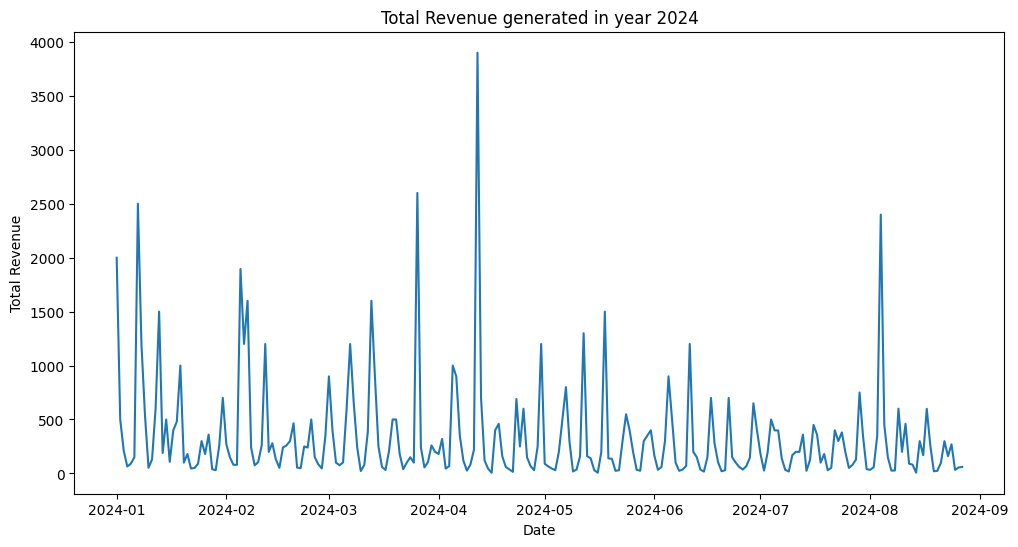

In [8]:
plt.figure(figsize=(12,6))
plt.title("Total Revenue generated in year 2024")
sns.lineplot(x='Date', y='Total Revenue',data=df,)
plt.xlabel("Date")

In [9]:
df2=df.groupby('Product Category')['Total Revenue'].sum().sort_values()
df2

Product Category
Books               1861.93
Beauty Products     2621.90
Clothing            8128.93
Sports             14326.52
Home Appliances    18646.16
Electronics        34982.41
Name: Total Revenue, dtype: float64

# 2.**Identifying Popular Product Catergory**

<Axes: title={'center': 'Popular Category based on Revenue Generation'}, xlabel='Product Category', ylabel='Total Revenue'>

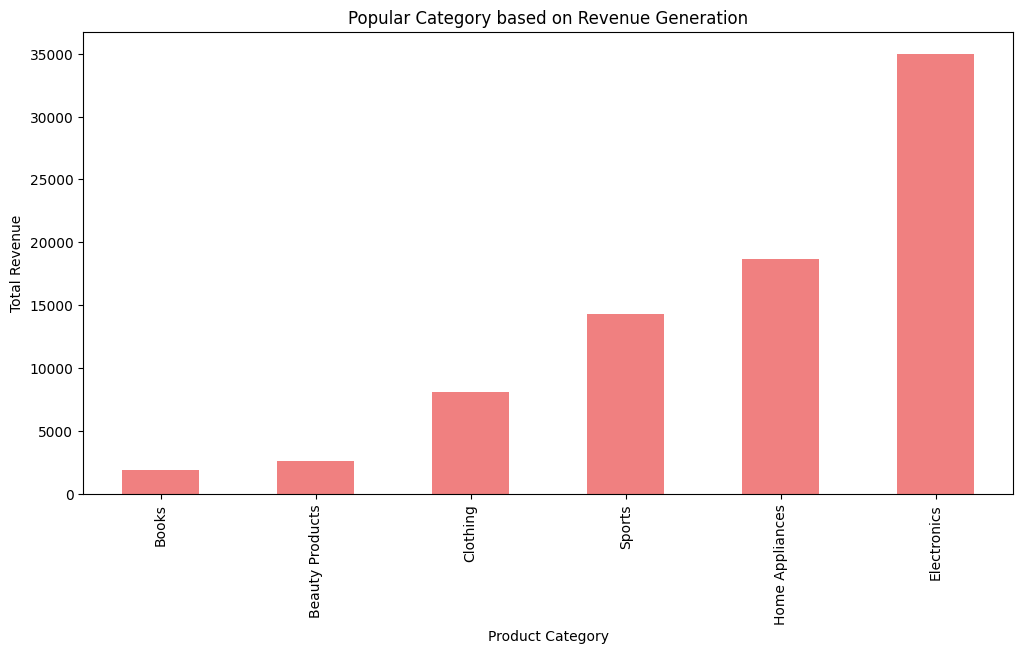

In [10]:
df2.plot(figsize=(12,6), kind='bar',title='Popular Category based on Revenue Generation',
         xlabel='Product Category',ylabel='Total Revenue', color='lightcoral')

<Axes: title={'center': 'Popular Category based on Most Units Sold'}, xlabel='Product Category', ylabel='Units Sold'>

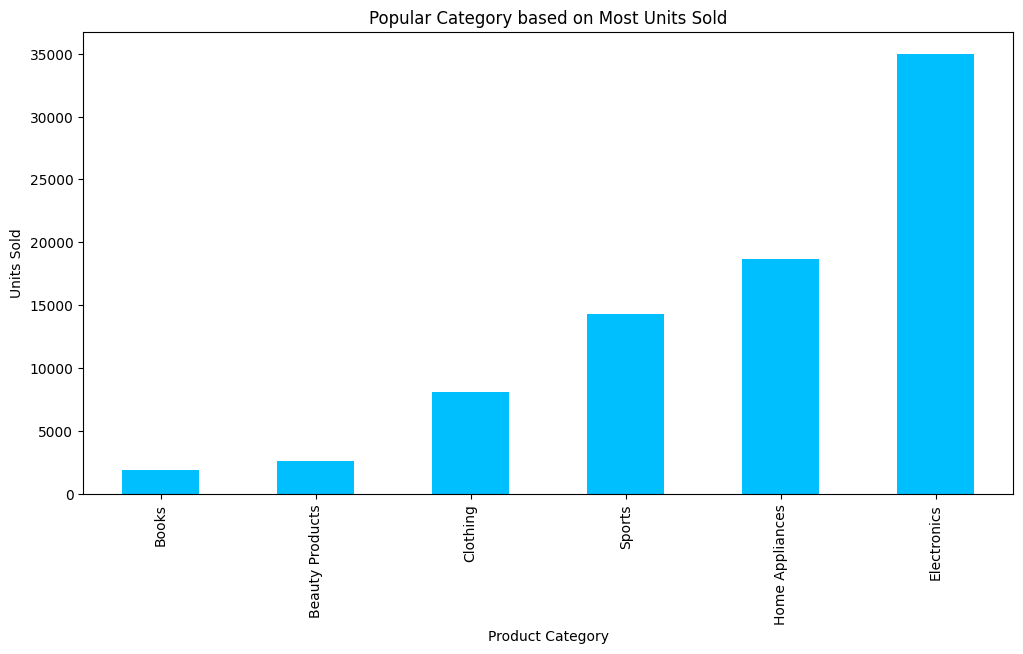

In [11]:
df2.plot(figsize=(12,6), kind='bar',title='Popular Category based on Most Units Sold',
         xlabel='Product Category',ylabel='Units Sold', color='deepskyblue')

In [12]:
asia = df[df['Region'] == 'Asia']
asia.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
5,10006,2024-01-06,Sports,Wilson Evolution Basketball,5,29.99,149.95,Asia,Credit Card
8,10009,2024-01-09,Clothing,Nike Air Force 1,6,89.99,539.94,Asia,Debit Card
11,10012,2024-01-12,Sports,Babolat Pure Drive Tennis Racket,3,199.99,599.97,Asia,Credit Card
14,10015,2024-01-15,Clothing,North Face Down Jacket,2,249.99,499.98,Asia,Debit Card


In [13]:
asia1=asia.groupby('Product Category')[['Total Revenue','Units Sold']].sum()
asia1

,Total Revenue,Units Sold
Product Category,,
Clothing,8128.93,145
Sports,14326.52,88


array([<Axes: ylabel='Total Revenue'>, <Axes: ylabel='Units Sold'>],
      dtype=object)

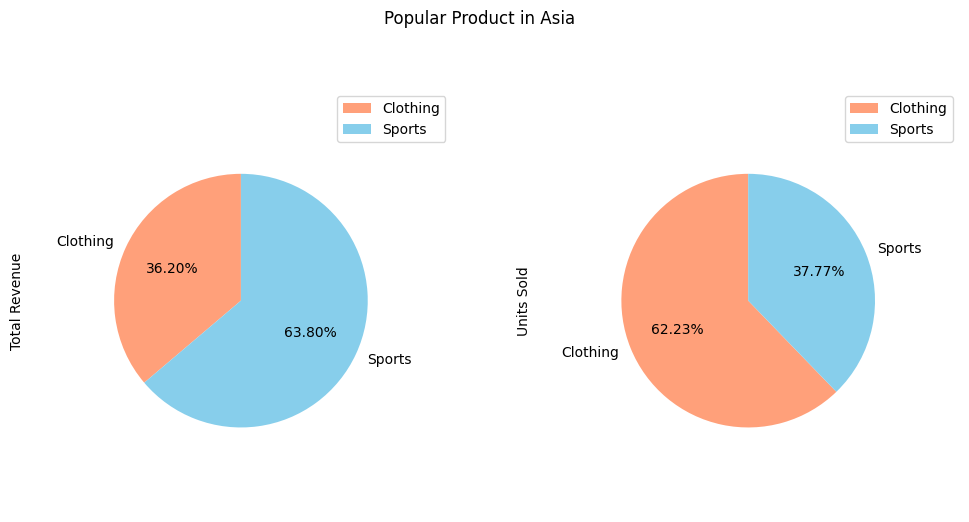

In [14]:
asia1.plot(figsize=(12,6),kind='pie',title='Popular Product in Asia',subplots=True, autopct='%.2f%%'
         ,colors=['lightsalmon','skyblue'], radius=0.75,startangle=90)

In [15]:
europe = df[df['Region'] == 'Europe']
europe.head()


,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
7,10008,2024-01-08,Home Appliances,Blueair Classic 480i,2,599.99,1199.98,Europe,PayPal
10,10011,2024-01-11,Beauty Products,Chanel No. 5 Perfume,1,129.99,129.99,Europe,PayPal
13,10014,2024-01-14,Home Appliances,Keurig K-Elite Coffee Maker,1,189.99,189.99,Europe,PayPal


In [16]:
europe1=europe.groupby('Product Category')[['Total Revenue','Units Sold']].sum()
europe1

,Total Revenue,Units Sold
Product Category,,
Beauty Products,2621.90,46
Home Appliances,18646.16,59


array([<Axes: ylabel='Total Revenue'>, <Axes: ylabel='Units Sold'>],
      dtype=object)

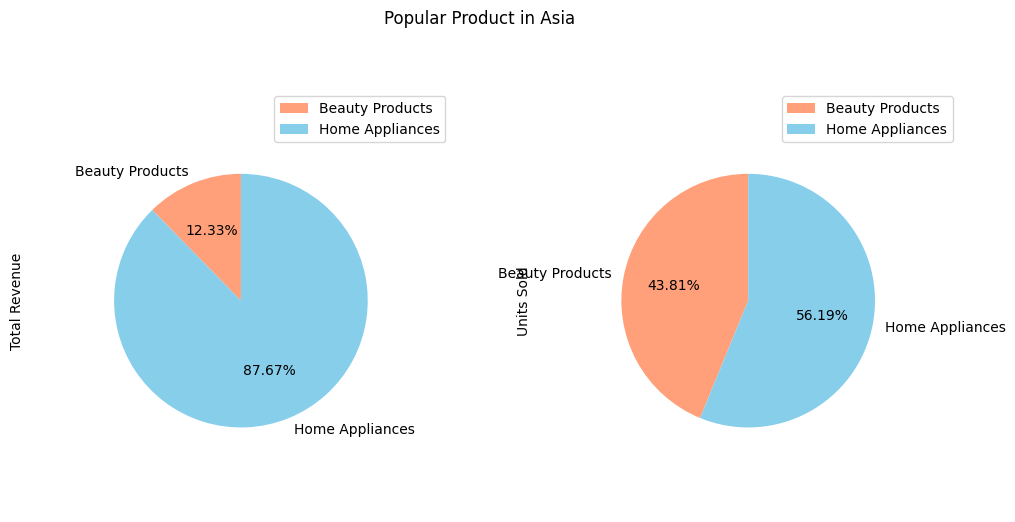

In [17]:
europe1.plot(figsize=(12,6),kind='pie',title='Popular Product in Asia',subplots=True, 
            autopct='%.2f%%',colors=['lightsalmon','skyblue'], radius=0.75,startangle=90)

In [18]:
north_america = df[df['Region'] == 'North America']
north_america.head()


,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
6,10007,2024-01-07,Electronics,MacBook Pro 16-inch,1,2499.99,2499.99,North America,Credit Card
9,10010,2024-01-10,Books,Dune by Frank Herbert,2,25.99,51.98,North America,Credit Card
12,10013,2024-01-13,Electronics,Samsung Galaxy Tab S8,2,749.99,1499.98,North America,Credit Card


In [19]:
north_america1=north_america.groupby('Product Category')[['Total Revenue','Units Sold']].sum()
north_america1

,Total Revenue,Units Sold
Product Category,,
Books,1861.93,114
Electronics,34982.41,66


array([<Axes: ylabel='Total Revenue'>, <Axes: ylabel='Units Sold'>],
      dtype=object)

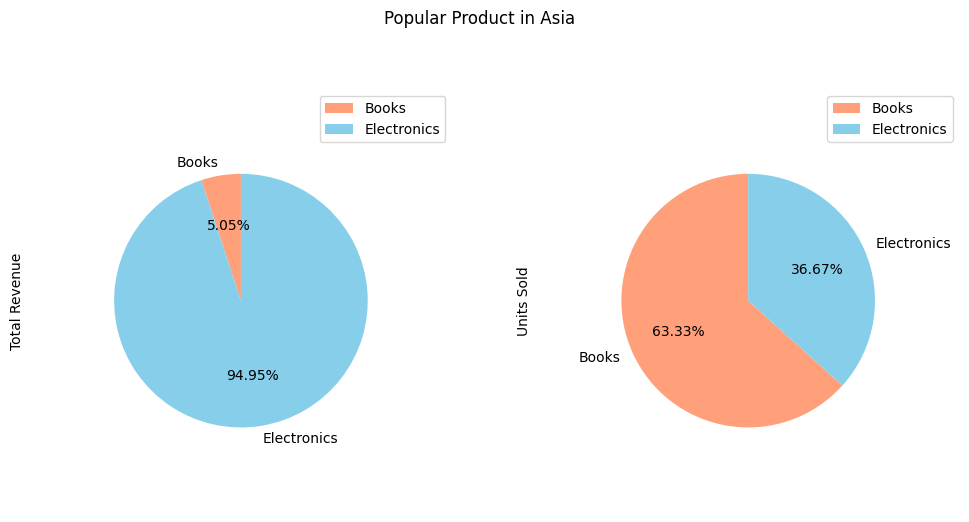

In [20]:
north_america1.plot(figsize=(12,6),kind='pie',title='Popular Product in Asia',subplots=True, 
            autopct='%.2f%%',colors=['lightsalmon','skyblue'], radius=0.75,startangle=90)

# Top 3 Products Region Wise

In [21]:
asia_sorted=asia.sort_values(by='Units Sold',ascending=False)
top_asia=asia_sorted.head(3)[['Product Name','Product Category']]
top_asia

,Product Name,Product Category
62,Hanes ComfortSoft T-Shirt,Clothing
47,Yeti Rambler Tumbler,Sports
8,Nike Air Force 1,Clothing


In [22]:
europe_sorted=europe.sort_values(by='Units Sold',ascending=False)
top_europe=europe_sorted.head(3)[['Product Name','Product Category']]
top_europe

,Product Name,Product Category
67,Eufy RoboVac 11S,Home Appliances
31,Instant Pot Duo,Home Appliances
145,Cuisinart Coffee Center,Home Appliances


In [23]:
north_america_sorted=north_america.sort_values(by='Units Sold',ascending=False)
top_america=north_america_sorted.head(3)[['Product Name','Product Category']]
top_america

,Product Name,Product Category
63,Where the Crawdads Sing by Delia Owens,Books
87,The Catcher in the Rye by J.D. Salinger,Books
3,The Da Vinci Code,Books


# Least Selling Product by Region

In [24]:
asia_sorted=asia.sort_values(by='Units Sold',ascending=True)
least_asia=asia_sorted.head(3)[['Product Name','Product Category']]
least_asia

,Product Name,Product Category
119,YETI Hopper Flip Portable Cooler,Sports
107,Bowflex SelectTech 552 Dumbbells,Sports
125,Yeti Roadie 24 Cooler,Sports


In [25]:
europe_sorted=europe.sort_values(by='Units Sold',ascending=True)
least_europe=europe_sorted.head(3)[['Product Name','Product Category']]
least_europe

,Product Name,Product Category
1,Dyson V11 Vacuum,Home Appliances
109,Cuisinart Griddler Deluxe,Home Appliances
112,Biore UV Aqua Rich Watery Essence Sunscreen,Beauty Products


In [26]:
north_america_sorted=north_america.sort_values(by='Units Sold',ascending=True)
least_america=north_america_sorted.head(3)[['Product Name','Product Category']]
least_america

,Product Name,Product Category
162,Apple MacBook Air,Electronics
84,Ring Video Doorbell,Electronics
156,Google Pixel 6 Pro,Electronics
